### BPSK source with unequal source probabilities

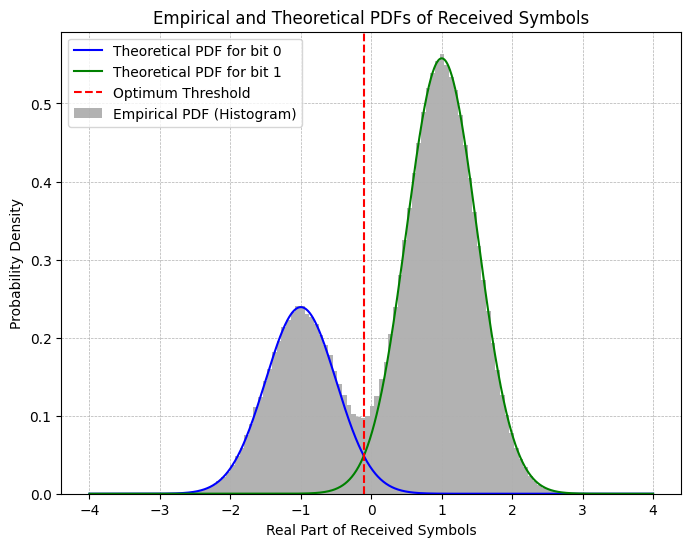

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
N = int(1e6)  # number of bits or symbols
np.random.seed(100)  # initializing the random number generator
Eb_N0_dB = 3  # SNR in dB

P_bit0 = 0.7  # Probability of bit 0
P_bit1 = 1 - P_bit0  # Probability of bit 1

# Generate biased random bits
ip = np.random.rand(N) > P_bit0  # P(bit=0) = 0.7, P(bit=1) = 0.3
s = 2 * ip - 1  # BPSK modulation: 0 -> -1; 1 -> 1

# Noise 
Eb_N0 = 10**(-Eb_N0_dB / 20)
sigma = Eb_N0 / np.sqrt(2)  # noise std deviation for BPSK over AWGN

# Generate noise
n = (np.random.randn(N) + 1j * np.random.randn(N))  # AWGN, complex noise

# Noise addition
y = s +  sigma * n  # additive white Gaussian noise

# Theoretical threshold calculation
opt_threshold = (sigma**2)/2 * np.log(P_bit0 / P_bit1)  # Optimum threshold for ML decision

# Compute histogram for the real part of y
bins = 100  # Number of bins for the histogram
hist, bin_edges = np.histogram(np.real(y), bins=bins, density=True)  # Normalize to approximate PDF
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Plot histogram as PDF
plt.figure(figsize=(8, 6))
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.6, label='Empirical PDF (Histogram)', color='gray')

# Overlay theoretical PDFs
x = np.linspace(-4, 4, 1000)
pdf_bit0 = norm.pdf(x, loc=-1, scale=sigma) * P_bit0  # PDF for bit 0
pdf_bit1 = norm.pdf(x, loc=1, scale=sigma) * P_bit1  # PDF for bit 1
plt.plot(x, pdf_bit0, label='Theoretical PDF for bit 0', color='blue')
plt.plot(x, pdf_bit1, label='Theoretical PDF for bit 1', color='green')

# Add decision threshold
plt.axvline(opt_threshold, color='red', linestyle='--', label='Optimum Threshold')

# Plot formatting
plt.title('Empirical and Theoretical PDFs of Received Symbols')
plt.xlabel('Real Part of Received Symbols')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

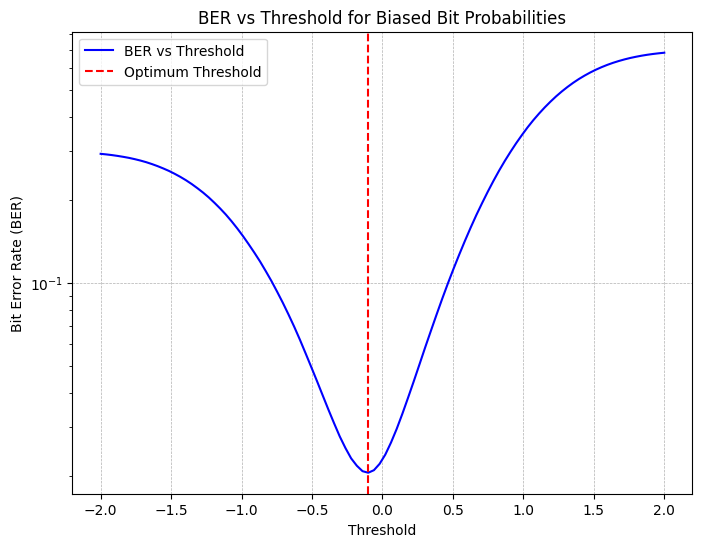

Optimum Threshold: -0.1061637176764423
Minimum BER at Optimum Threshold: 0.020487


In [107]:
# Sweep thresholds and calculate BER
thresholds = np.linspace(-2, 2, 100)  # Range of thresholds to sweep
ber_values = []

for threshold in thresholds:
    ipHat = np.real(y) > threshold  # Decision based on the current threshold
    errors = np.sum(ip != ipHat)  # Count errors
    ber_values.append(errors / N)  # Calculate BER

# Plot BER vs Threshold
plt.figure(figsize=(8, 6))
plt.semilogy(thresholds, ber_values, label='BER vs Threshold', color='blue')
plt.axvline(opt_threshold, color='red', linestyle='--', label='Optimum Threshold')
plt.title('BER vs Threshold for Biased Bit Probabilities')
plt.xlabel('Threshold')
plt.ylabel('Bit Error Rate (BER)')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Print results
print(f"Optimum Threshold: {opt_threshold}")
print(f"Minimum BER at Optimum Threshold: {min(ber_values)}")